# PCA : Principal Component Analysis

PCA is a statistical technique invented in 1901 by Karl Pearson that uses orthogonal transformations to map a set of variables into a set of linearly uncorrelated variables called Principal Components.

PCA is based on the Singular Value Decomposition (SVD) of the Covariance Matrix of the original dataset. The Eigenvectors of such decomposition are used as a rotation matrix. The Eigenvectors are arranged in the rotation matrix in decreasing order according to its explained variance. This last term is related to the EigenValues of the SVD.

PCA is a potent technique with applications ranging from simple space transformation, dimensionality reduction, and mixture separation from spectral information.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

https://scikit-learn.org/stable/modules/decomposition.html#pca

## PCA as a strategy for dimensionality reduction

- The principal components contained in the rotation matrix, are decreasingly sorted depending on its explained Variance. It usually means that the first components retain most of the power of the data to explain the patterns that **generalize** the data. 
- Nevertheless, for some applications, we are interested in the patterns that explain much less Variance, for example, in novelty detection. 

In the next figure, we can see the original data and its corresponding projection using dimenson axes as principal components. In other words, data comprised of a single variable.

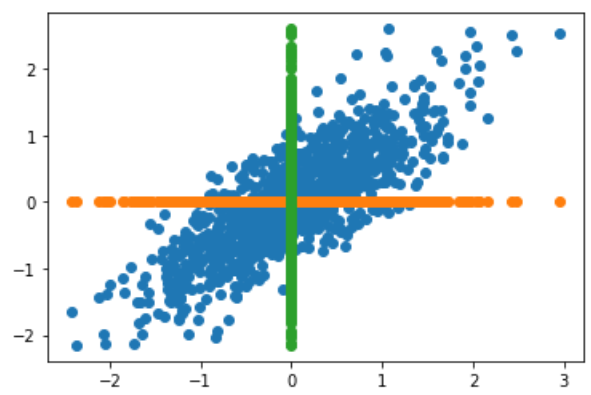


## PCA as a strategy to plot complex data

- The next chart shows a sample diagram displaying a dataset of pictures of cats and dogs. 
- Raw pictures are composed of hundreds or even thousands of features. 
- However, PCA allows us to reduce that many features to only two. In that reduced space of uncorrelated variables, we can easily separate cats and dogs. 

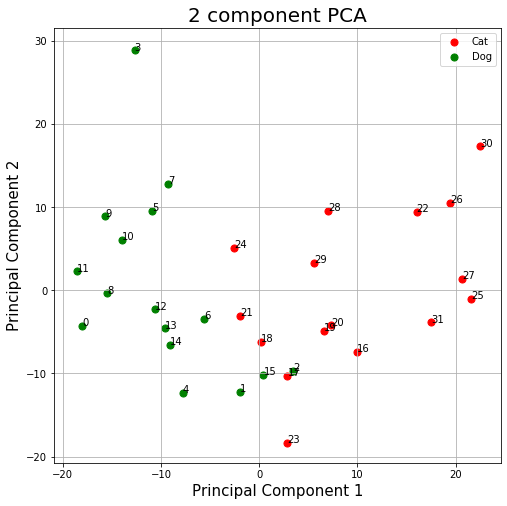



In [6]:
from sklearn.decomposition import PCA      # PCA library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt            # library for visualization

import random
import math

## Instantiate

```python
class sklearn.decomposition.PCA(n_components=None, 
                                *, 
                                copy=True, 
                                whiten=False, 
                                svd_solver='auto', 
                                tol=0.0, 
                                iterated_power='auto', 
                                n_oversamples=10, 
                                power_iteration_normalizer='auto', 
                                random_state=None)
```


- **`n_components`**: `int`, `float`, `None` or `str`
    - The number of components to keep. If `n_components` is not set, all components are kept. `n_components` can be an integer, a float between 0 and 1 (representing the fraction of variance to retain), or specific strings for algorithmic selection.

- **`copy`**: `bool`, default=`True`
    - If `True`, a copy of `X` is created. If `False`, `X` will be overwritten.

- **`whiten`**: `bool`, default=`False`
    - When `True`, the `components_` vectors are multiplied by the square root of `n_samples` and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.

- **`svd_solver`**: `str`, default=`'auto'`
    - The solver to use for the decomposition. Can be `'auto'`, `'full'`, `'arpack'`, or `'randomized'`.

- **`tol`**: `float`, default=`0.0`
    - Tolerance for singular values computed by `svd_solver='arpack'`.

- **`iterated_power`**: `str` or `int`, default=`'auto'`
    - The number of iterations for the power method computed by `svd_solver='randomized'`.

- **`n_oversamples`**: `int`, default=`10`
    - Oversampling parameter for `svd_solver='randomized'` to ensure higher accuracy.

- **`power_iteration_normalizer`**: `str`, default=`'auto'`
    - Normalizer for the power iteration method (`'auto'`, `'none'`, `'LU'`, `'QR'`), only used when `svd_solver='randomized'`.

- **`random_state`**: `int`, `RandomState instance` or `None`, default=`None`
    - If `int`, `random_state` is the seed used by the random number generator; if `RandomState` instance, `random_state` is the random number generator; if `None`, the random number generator is the `RandomState` instance used by `np.random`.


## PCA Class Attributes

### `components_`: ndarray of shape (n_components, n_features)
- **Description**: Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, these are the right singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by `explained_variance_`.

### `explained_variance_`: ndarray of shape (n_components,)
- **Description**: The amount of variance explained by each of the selected components. This estimation uses `n_samples - 1` degrees of freedom. It is equal to the `n_components` largest eigenvalues of the covariance matrix of `X`.
- **New in version 0.18**.

### `explained_variance_ratio_`: ndarray of shape (n_components,)
- **Description**: Percentage of variance explained by each of the selected components. If `n_components` is not set, then all components are stored and the sum of the ratios is equal to 1.0.

### `singular_values_`: ndarray of shape (n_components,)
- **Description**: The singular values corresponding to each of the selected components. These values are equal to the 2-norms of the `n_components` variables in the lower-dimensional space.
- **New in version 0.19**.

### `mean_`: ndarray of shape (n_features,)
- **Description**: Per-feature empirical mean, estimated from the training set. Equal to `X.mean(axis=0)`.

### `n_components_`: int
- **Description**: The estimated number of components. When `n_components` is set to ‘mle’ or a number between 0 and 1 (with `svd_solver == 'full'`) this number is estimated from input data. Otherwise, it equals the parameter `n_components`, or the lesser value of `n_features` and `n_samples` if `n_components` is `None`.

### `n_samples_`: int
- **Description**: Number of samples in the training data.

### `noise_variance_`: float
- **Description**: The estimated noise covariance following the Probabilistic PCA model from Tipping and Bishop 1999. It is required to compute the estimated data covariance and score samples. Equal to the average of (min(`n_features`, `n_samples`) - `n_components`) smallest eigenvalues of the covariance matrix of `X`.

### `n_features_in_`: int
- **Description**: Number of features seen during fit.
- **New in version 0.24**.

### `feature_names_in_`: ndarray of shape (`n_features_in_`,)
- **Description**: Names of features seen during fit. Defined only when `X` has feature names that are all strings.


## PCA Class Methods

### `fit(X[, y])`

- **Description**: Fit the model with `X`.
- **Parameters**:
    - **`X`**: `array-like` or `sparse matrix`, shape `(n_samples, n_features)`
        - Training data.
    - **`y`**: Ignored. Not used, present here for API consistency by convention.

### `fit_transform(X[, y])`

- **Description**: Fit the model with `X` and apply the dimensionality reduction on `X`.
- **Parameters**:
    - **`X`**: `array-like` or `sparse matrix`, shape `(n_samples, n_features)`
        - Training data to fit.
    - **`y`**: Ignored. Not used, present here for API consistency by convention.

### `get_covariance()`

- **Description**: Compute data covariance with the generative model.

### `get_feature_names_out([input_features])`

- **Description**: Get output feature names for transformation.

### `get_metadata_routing()`

- **Description**: Get metadata routing of this object.

### `get_params([deep])`

- **Description**: Get parameters for this estimator.
- **Parameters**:
    - **`deep`**: `bool`, default=`True`
        - If True, will return the parameters for this estimator and contained subobjects that are estimators.

### `get_precision()`

- **Description**: Compute data precision matrix with the generative model.

### `inverse_transform(X)`

- **Description**: Transform data back to its original space.
- **Parameters**:
    - **`X`**: `array-like` or `sparse matrix`, shape `(n_samples, n_components)`
        - New data, where `n_samples` is the number of samples and `n_components` is the number of components.

### `score(X[, y])`

- **Description**: Return the average log-likelihood of all samples.
- **Parameters**:
    - **`X`**: `array-like` or `sparse matrix`, shape `(n_samples, n_features)`
        - Test samples.

### `score_samples(X)`

- **Description**: Return the log-likelihood of each sample.
- **Parameters**:
    - **`X`**: `array-like` or `sparse matrix`, shape `(n_samples, n_features)`
        - Test samples.

### `set_output(*[, transform])`

- **Description**: Set output container.

### `set_params(**params)`

- **Description**: Set the parameters of this estimator.

### `transform(X)`

- **Description**: Apply dimensionality reduction to `X`.
- **Parameters**:
    - **`X`**: `array-like` or `sparse matrix`, shape `(n_samples, n_features)`
        - New data to transform.

## Usage 


* ``pca.fit(tab)`` Instantiate a PCA. Choose to get 2 output variables
* PCA works better if the data is centered

````python
x = x - np.mean(x) 
y = y - np.mean(y) 
````

* ``pcaTr = pca.fit(data) `` Create the transformation model for this data. Internally, it gets the rotation matrix and the explained variance
* ``rotatedData = pcaTr.transform(data) `` :Transform the data base on the rotation matrix of pcaTr
* `pcaTr.components_` has the rotation matrix 
* `pcaTr.explained_variance_` has the explained variance of each principal component


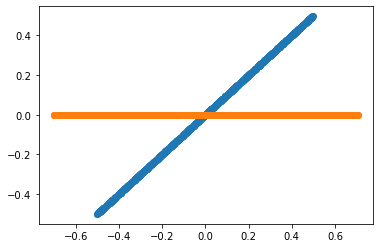

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues or explained variance
[1.66465230e-01 2.08930963e-34]


In [7]:
np.random.seed(1)
n = 1  # The amount of the correlation
x = np.random.uniform(1,2,1000) 
y = x.copy() * n 

# PCA works better if the data is centered
x = x - np.mean(x) 
y = y - np.mean(y) 

data = pd.DataFrame({'x': x, 'y': y}) 
plt.scatter(data.x, data.y)

pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally, it gets the rotation matrix and the explained variance
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data) # Transform the data base on the rotation matrix of pcaTr

dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2']) 

# Plot the transformed data in orange
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)


### Correlated Normal Random Variables.

Now, we will use a controlled dataset composed of 2 random variables with different variances and with a specific Covariance among them.

angle:  45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


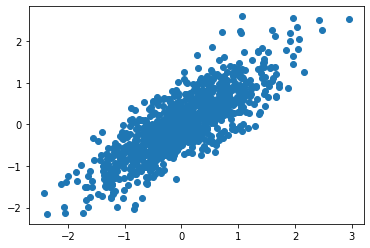

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.70827652  0.7059351 ]
 [-0.7059351   0.70827652]]

Eigenvalues or explained variance
[1.09488457 0.11243237]


C:\Users\GUEGUEN\AppData\Local\Temp\ipykernel_12936\4001520129.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
C:\Users\GUEGUEN\AppData\Local\Temp\ipykernel_12936\4001520129.py:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')


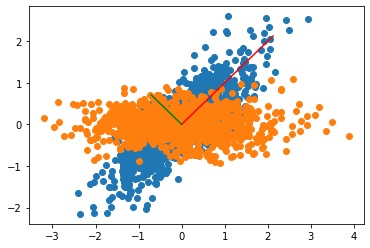

In [9]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

np.random.seed(100)

std1 = 1     # The desired standard deviation of our first random variable
std2 = 0.333 # The desired standard deviation of our second random variable

x = np.random.normal(0, std1, 1000) # Get 1000 samples from x ~ N(0, std1)
y = np.random.normal(0, std2, 1000)  # Get 1000 samples from y ~ N(0, std2)
#y = y + np.random.normal(0,1,1000)*noiseLevel * np.sin(0.78)

# PCA works better if the data is centered
x = x - np.mean(x) # Center x 
y = y - np.mean(y) # Center y

#Define a pair of dependent variables with a desired amount of covariance
n = 1 # Magnitude of covariance. 
angle = np.arctan(1 / n) # Convert the covariance to and angle
print('angle: ',  angle * 180 / math.pi)

# Create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
                 [-np.sin(angle), np.cos(angle)]])


print('rotationMatrix')
print(rotationMatrix)

xy = np.concatenate(([x] , [y]), axis=0).T # Create a matrix with columns x and y

# Transform the data using the rotation matrix. It correlates the two variables
data = np.dot(xy, rotationMatrix) # Return a nD array

# Print the rotated data
plt.scatter(data[:,0], data[:,1])
plt.show()

plt.scatter(data[:,0], data[:,1]) # Print the original data in blue

# Apply PCA. In theory, the Eigenvector matrix must be the 
# inverse of the original rotationMatrix. 
pca = PCA(n_components=2)  # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

# Create an array with the transformed data
dataPCA = pcaTr.transform(data)

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')

plt.show()